# Problem Set 1

**Task:** The problem set comprises three points (all have to be addressed):

1.   Use NumPy to simulate two, 1-mode, unweighted, and undirected networks
     with 100 nodes. A first network G_ld should have average degree = 3, while
     a second network G_hd should have average degree = 8.
2.   Use NumPy to simulate a 1-mode, unweighted, and undirected network
     with 1000 nodes. This synthetic network should have the following
     degree distribution:

k  | p(k)
---|-----
0  | 0
1  | 0.1
2  | 0.35
3  | 0.25
4  | 0.1
5  | 0.1
6  | 0.04
7  | 0.01
8  | 0.02
9  | 0.02
10 | 0.01


3.   Use NumPy to simulate a 2-mode, unweighted network wherein the actors
     of the first mode exhibit the following degree distribution:

k  | p(k)
---|-----
0  | 0.1
1  | 0.1
2  | 0.35
3  | 0.25
4  | 0.2



# Import relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Task 1
Use NumPy to simulate two, 1-mode, unweighted, and undirected networks with 100 nodes. A first network G_ld should have average degree = 3, while a second network G_hd should have average degree = 8.

## Average degree

$
\langle k \rangle = \frac{1}{N} \sum_{i = 1}^{N}k_{i}
$

For 1-mode, unweighted, and undirected networks, the dimension of an adjacency matrix is equal to (num_nodes * num_nodes). From the formula, the sum of degree is equal to num_node * avg_degree

In [2]:
def random_onemode_unweighted_undirected_network(num_nodes, avg_degree, color = 'orange'):
    
    # check if the types of input arguments are supported
    assert type(num_nodes) == int, 'Please insert an integer in the `num_nodes` argument'
    assert (avg_degree >= 0) & (avg_degree <= num_nodes-1), '`avg_degree` should be a number between [0, num_nodes-1]'
    
    # initialize a new graph object
    G = nx.Graph()
    
    # define the set of nodes
    node_list = [i for i in range(num_nodes)]
    
    # populate the graph with nodes
    G.add_nodes_from(node_list)

    # populate egdes
    edges = []
    num_edges = (num_nodes * avg_degree / 2)
    # use while loop to iterate and append tuples to the list until len(edges) = num_edges
    while len(edges) < num_edges:
        # sample tuple of nodes from node_list, set replace = False so it does not give two similar numbers
        to_append = tuple(np.random.choice(node_list, size = 2, replace = False))
        # check the two conditions to ensure appended tuple is a valid edge
        # the two conditions include: tuple or reverse of tuple is unique
        if (to_append not in edges) & (to_append[::-1] not in edges):
            edges.append(to_append)
    
    # populate the graph with edges
    G.add_edges_from(edges)
    
    # add some styles to the graph
    options = {
    'node_color': color,
    'alpha': 1,
    'width': 1,
    'with_labels': True,
    'font_color': 'white'}
    
    # set graph pattern
    pos = nx.kamada_kawai_layout(G)
    
    #set graph size
    plt.figure(figsize=(10, 10)) 
    
    # draw the network
    nx.draw(G, pos, **options)
    
    # title of the plot
    plt.title("1-Mode, Unweighted, Undirected Network", fontsize=24)
    
    # show the plot
    plt.show()
    
    return G

def check_avg_degree(G):
    # print out the average degree
    return print('Average Degree:',np.mean(list(dict(G.degree).values())))

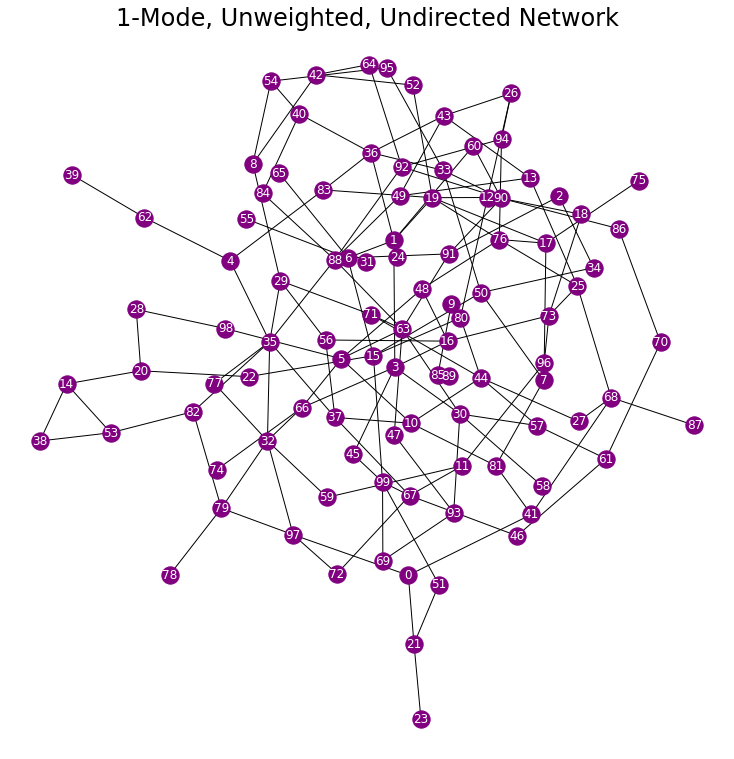

Average Degree: 3.0


In [3]:
# Low density network (num_nodes = 100, avg_degree = 3)
num_nodes = 100; avg_degree = 3
G_ld = random_onemode_unweighted_undirected_network(num_nodes, avg_degree, color = 'purple')
check_avg_degree(G_ld)

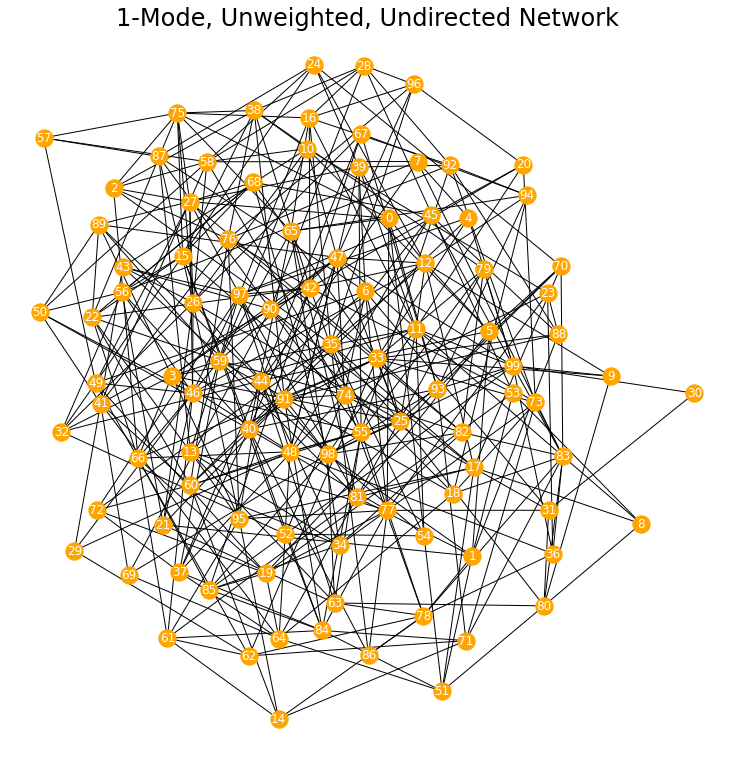

Average Degree: 8.0


In [4]:
# High density network (num_nodes = 100, avg_degree = 8)
num_nodes = 100; avg_degree = 8
G_hd = random_onemode_unweighted_undirected_network(100, 8)
check_avg_degree(G_hd)

# Task 2
2.   Use NumPy to simulate a 1-mode, unweighted, and undirected network
     with 1000 nodes. This synthetic network should have the following
     degree distribution:

k  | p(k)
---|-----
0  | 0
1  | 0.1
2  | 0.35
3  | 0.25
4  | 0.1
5  | 0.1
6  | 0.04
7  | 0.01
8  | 0.02
9  | 0.02
10 | 0.01


In [5]:
def prob_onemode_unweighted_undirected_network(num_nodes, probs, color = 'orange'):
    # please note that it may take some time to run the function; usually it takes less than 2 minutes
    
    # check if the types of input arguments are supported
    assert type(num_nodes) == int, 'Please insert an integer in the `num_nodes` argument'
    assert type(probs) == list, 'Please insert a list containing tuples in the `probs` argument'
    for prob in probs:
        assert type(prob) == tuple, 'Please make sure elements in `probs` are tuple'
    assert np.sum([(prob[1]) for prob in probs]) == 1, 'Please make sure the sum of probability distribution is equal to 1'
    
    # initialize a new graph object
    G = nx.Graph()
    
    # define the set of nodes
    node_list = [i for i in range(num_nodes)]
    
    # populate the graph with nodes
    G.add_nodes_from(node_list)

    # populate egdes
    edges = []
    # initiate `store_num` list to store numbers for creating edges
    stored_num = []
    # create `sampling_pool` to store pool of numbers for sampling
    sampling_pool = node_list
    for prob in probs:
        # generate list of nodes; prob[0] = k and prob[1] = p(k)
        # for example, if k = 5, p(k) = 0.1; it means 10% of the nodes appear 5 times in the edges
        # this code generate prob[1]*num_nodes unique numbers prob[0] times
        num_list = list(np.random.choice(sampling_pool, size = int(prob[1]*num_nodes), replace = False)) * prob[0]
        # remove numbers that has been generated from the sampling pool
        sampling_pool = list(set(sampling_pool) - set(num_list))
        # add nodes in `num_list` to `stored_num`
        stored_num.extend(num_list)
    # create tuples from `stored_num`
    while len(stored_num) > 0:
        # random 2 unique numbers from `stored_num` to create an edge
        edge = tuple(np.random.choice(stored_num, size = 2, replace = False))
        # check the two conditions to ensure appended tuple is a valid edge
        # the two conditions include: tuple or reverse of tuple is unique
        if (edge not in edges) & (edge[::-1] not in edges):
            # store `edge` in `edges`
            edges.append(edge)
        # remove elements in edge from stored_num
        stored_num.remove(edge[0]); stored_num.remove(edge[1])
    
    # populate the graph with edges
    G.add_edges_from(edges)
    
    # add some styles to the graph
    options = {
    'node_color': color,
    'alpha': 1,
    'width': 1,
    'with_labels': True,
    'font_color': 'white'}
    
    # set graph pattern
    pos = nx.kamada_kawai_layout(G)
    
    #set graph size
    plt.figure(figsize=(10, 10)) 
    
    # draw the network
    nx.draw(G, pos, **options)
    
    # title of the plot
    plt.title("1-Mode, Unweighted, Undirected Network", fontsize=24)
    
    # show the plot
    plt.show()
    
    return G


def check_degree_distribution(G):
    # initiate two dictionaries: `dictionary` was to store keys and values from `G.degree`
    # to_return was just to store data to print out organized human readable text
    dictionary = {}
    to_return = {}
    # loop over `dict(G.degree)` and store keys and their frequencies
    for key, value in dict(G.degree).items():
        # if the key is already exist, we want to add one to its frequency
        if value in dictionary:
            dictionary[value] = dictionary[value] + 1
        # if the key does not exist, we want to create it with a frequency of 1
        else:
            dictionary[value] = 1
    # sort `dictionary` and store it in `to_return`         
    for key in sorted(dictionary):
        to_return[key] = dictionary[key] / num_nodes
    # print out the result including: `k` and `p(k)`
    print('Degree Distribution: \n------------------------')
    for key, value in to_return.items():
        if key < 10:
            print('For k = {}  | p(k) = {:.2f}'.format(key, value))
        else:
            print('For k = {} | p(k) = {:.2f}'.format(key, value))
    return None

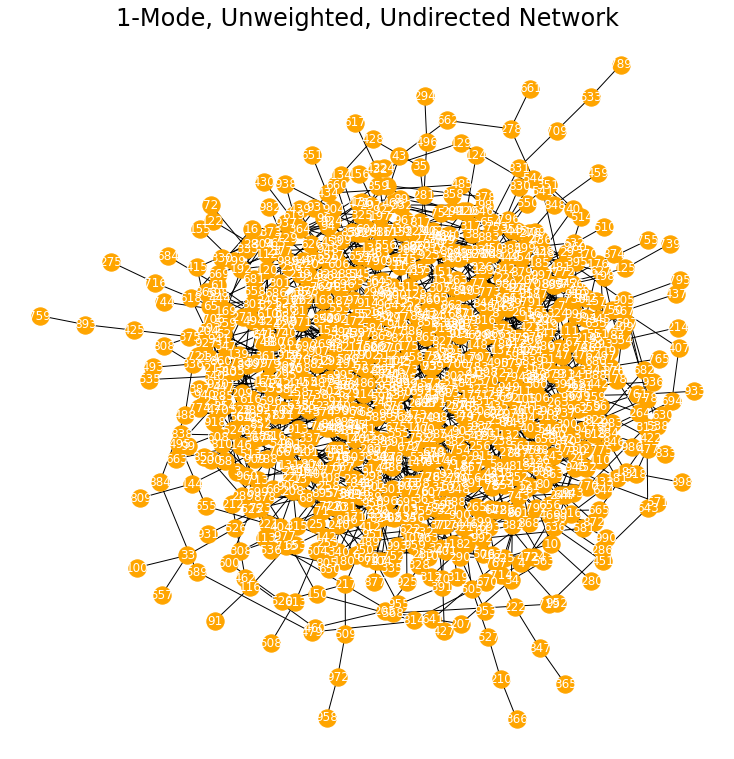

Degree Distribution: 
------------------------
For k = 1  | p(k) = 0.10
For k = 2  | p(k) = 0.35
For k = 3  | p(k) = 0.25
For k = 4  | p(k) = 0.10
For k = 5  | p(k) = 0.10
For k = 6  | p(k) = 0.04
For k = 7  | p(k) = 0.01
For k = 8  | p(k) = 0.02
For k = 9  | p(k) = 0.02
For k = 10 | p(k) = 0.01


In [6]:
# 1-mode, unweighted, and undirected network with 1000 nodes and degree distribution
num_nodes = 1000
probs = [(0,0), (1,0.1), (2,0.35), (3,0.25), (4,0.1), (5,0.1), (6,0.04), (7,0.01), (8,0.02), (9,0.02), (10,0.01)]

G = prob_onemode_unweighted_undirected_network(num_nodes, probs)

check_degree_distribution(G)

# Task 3

3.   Use NumPy to simulate a 2-mode, unweighted network wherein the actors
     of the first mode exhibit the following degree distribution:

k  | p(k)
---|-----
0  | 0.1
1  | 0.1
2  | 0.35
3  | 0.25
4  | 0.2

In [7]:
def prob_twomode_unweighted_network(first_num_nodes, second_num_nodes, probs, color1 = 'forestgreen', color2 = 'darkturquoise'):

    # check if the types of input arguments are supported
    assert type(first_num_nodes) == int, 'Please insert an integer in the `first_num_nodes` argument'
    assert type(second_num_nodes) == int, 'Please insert an integer in the `second_num_nodes` argument'
    assert type(probs) == list, 'Please insert a list containing tuples in the `probs` argument'
    for prob in probs:
        assert type(prob) == tuple, 'Please make sure elements in `probs` are tuple'
    assert np.sum([(prob[1]) for prob in probs]) == 1, 'Please make sure the sum of probability distribution is equal to 1'
    
    # initialize a new graph object
    B = nx.Graph()
    
    # generate and add mode1 nodes
    mode1_nodes = ['A' + str(x) for x in np.linspace(0, first_num_nodes, num = first_num_nodes).astype(int)]
    B.add_nodes_from(mode1_nodes, bipartite=0)
    
    # generate and add mode2 nodes
    mode2_nodes = ['B' + str(x) for x in np.linspace(0, second_num_nodes, num = second_num_nodes).astype(int)]
    B.add_nodes_from(mode2_nodes, bipartite=1)

    # populate egdes
    edges = []
    # initiate `store_num1` and `store_num2` lists to store numbers for creating edges
    stored_num1 = []
    stored_num2 = []
    # create `sampling_pool1` and `sampling_pool2` to store pool of numbers for sampling
    sampling_pool1 = mode1_nodes
    sampling_pool2 = mode2_nodes
    for prob in probs:
        # generate list of nodes for mode1; prob[0] = k and prob[1] = p(k)
        # for example, if k = 4, p(k) = 0.2; it means 20% of the nodes appear 4 times in the edges
        # this code generate prob[1]*num_nodes unique numbers prob[0] times
        num_list1 = list(np.random.choice(sampling_pool1, size = int(prob[1]*first_num_nodes), replace = False)) * prob[0]
        # remove numbers that has been generated from the sampling pool
        sampling_pool1 = list(set(sampling_pool1) - set(num_list1))
        # add nodes in `num_list1` to `stored_num1`
        stored_num1.extend(num_list1)
        
        # generate list of nodes for mode2: since we do not care about the probability distribution of mode2 
        # random sample work fine. The size should be the same as that generated from mode1.
        num_list2 = list(np.random.choice(sampling_pool2, size = int(prob[1]*first_num_nodes*prob[0]), replace = True))
        # add nodes in `num_list1` to `stored_num1`
        stored_num2.extend(num_list2)
        
    # create edges from `stored_num1` and `stored_num2`
    edges = list(zip(stored_num1, stored_num2))
    
    # populate the graph with edges
    B.add_edges_from(edges)
    
    # fix positions for user nodes
    pos = {node: [0, i] for i, node in enumerate(mode1_nodes)}

    # fix positions for song/product nodes
    pos.update({node: [1, i] for i, node in enumerate(mode2_nodes)})

    #set graph size
    plt.figure(figsize=(10, 10)) 
    
    # draw the network for mode1
    nx.draw(B,
            pos,
            nodelist=list(mode1_nodes),
            node_color=color1,
            with_labels=False,
            node_size=150,
            font_size=24)

    # draw the network for mode2
    nx.draw(B,
            pos,
            nodelist=list(mode2_nodes),
            node_color=color2,
            node_shape='s',
            with_labels=False,
            node_size=150,
            font_size=24)
    
    # title of the plot
    plt.title("2-Mode, Unweighted Network", fontsize=24)
    
    # show the plot
    plt.show()
    
    return B, mode1_nodes


def check_mode1_degree_distribution(B):
    # initiate two dictionaries: `dictionary` was to store keys and values from `B.degree`
    # to_return was just to store data to print out organized human readable text
    dictionary = {}
    to_return = {}
    # loop over `dict(B.degree)` and store keys and their frequency
    for key, value in dict(B.degree).items():
        if key in mode1_nodes:
            # if the key is already exist, we want to add one to its frequency
            if value in dictionary:
                dictionary[value] = dictionary[value] + 1
            # if the key does not exist, we want to create it with a frequency of 1
            else:
                dictionary[value] = 1
    # sort `dictionary` and store it in `to_return`         
    for key in sorted(dictionary):
        to_return[key] = dictionary[key] / first_num_nodes
    # print out the result including: `k` and `p(k)`
    print('Degree Distribution: \n------------------------')
    for key, value in to_return.items():
        print('For k = {} | p(k) = {:.2f}'.format(key, value))
    return None

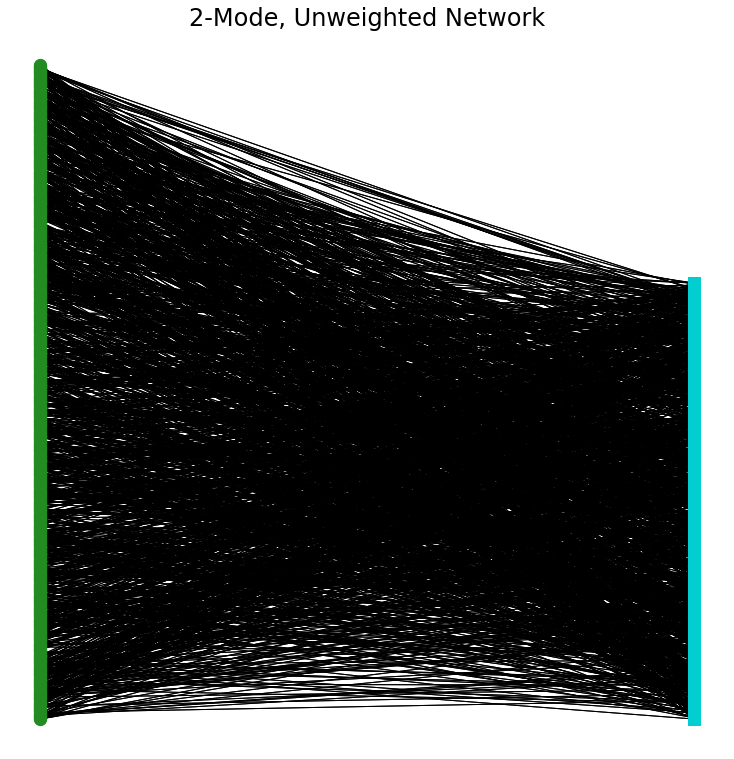

Degree Distribution: 
------------------------
For k = 0 | p(k) = 0.10
For k = 1 | p(k) = 0.10
For k = 2 | p(k) = 0.35
For k = 3 | p(k) = 0.25
For k = 4 | p(k) = 0.20


In [8]:
# 2-mode, unweighted network with degree distribution
first_num_nodes = 600
second_num_nodes = 400
probs = [(0, 0.1), (1, 0.1), (2, 0.35), (3, 0.25), (4, 0.2)]

B, mode1_nodes = prob_twomode_unweighted_network(first_num_nodes, second_num_nodes, probs)

check_mode1_degree_distribution(B)